# Assignment 1

First we need to import a few modules, execute the cell below:

In [6]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [7]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    # YOUR CODE HERE

    return numpy.cos(x)


You can use the following cell to check that your code works for scalar arguments:

In [8]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [9]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [10]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
   # YOUR CODE HERE
def df_analytic(x):
    return -numpy.sin(x)




In [11]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [12]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [13]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    # YOUR CODE HERE
def backward_difference(f, x, dx):
    
    return ((f(x)-f(x-dx))/dx)


In [14]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


[ 4.99999997e-05 -1.26542856e-01 -2.51099589e-01 -3.71616037e-01
 -4.86153043e-01 -5.92867665e-01 -6.90042824e-01 -7.76114935e-01
 -8.49699067e-01 -9.09611223e-01 -9.54887394e-01 -9.84799069e-01
 -9.98864958e-01 -9.96858737e-01 -9.78812685e-01 -9.45017171e-01
 -8.96015976e-01 -8.32597549e-01 -7.55782316e-01 -6.66806263e-01
 -5.67101047e-01 -4.58270963e-01 -3.42067127e-01 -2.20359304e-01
 -9.51058167e-02  3.16779586e-02  1.57952024e-01  2.81684582e-01
  4.00884729e-01  5.13634492e-01  6.18119683e-01  7.12659096e-01
  7.95731559e-01  8.66000402e-01  9.22334975e-01  9.63828833e-01
  9.89814324e-01  9.99873333e-01  9.93844005e-01  9.71823355e-01
  9.34165703e-01  8.81476976e-01  8.14604954e-01  7.34625633e-01
  6.42825911e-01  5.40682879e-01  4.29840058e-01  3.12080949e-01
  1.89300340e-01  6.34738189e-02 -6.33740202e-02 -1.89202148e-01
 -3.11985942e-01 -4.29749765e-01 -5.40598754e-01 -6.42749306e-01
 -7.34557782e-01 -8.14546948e-01 -8.81429748e-01 -9.34130014e-01
 -9.71799779e-01 -9.93832

'Δx=1e-4 is the case where Δx is too big, Δx=1e-8 where Δx is about right, and Δx=1e-12 is the case where Δx=1e-12 is too small'

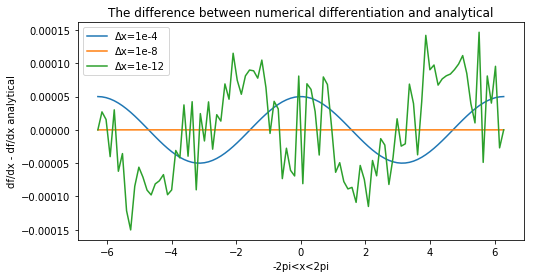

In [17]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_2 = backward_difference(f, xs, dx=1e-8)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical)
plt.plot(xs, df_dx_2 - df_dx_analytical)
plt.plot(xs, df_dx_3 - df_dx_analytical)



plt.ylabel("df/dx - df/dx analytical")
plt.xlabel("-2pi<x<2pi")
plt.title("The difference between numerical differentiation and analytical")
plt.legend(("Δx=1e-4", "Δx=1e-8", "Δx=1e-12"))

"Δx=1e-4 is the case where Δx is too big, Δx=1e-8 where Δx is about right, and Δx=1e-12 is the case where Δx=1e-12 is too small"

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When Δx is too large, the straight line segment that we use to approximate the curve by using this method, deviates more from the curve as you increase Δx. Therefore, the gradient of the line segment becomes further from the gradient of the actual function, so decreasing its accuracy. 
The computer stores numbers to a finite precision, so when Δx becomes too small, the computer cannot store the values to a high enough precision so some of the digits are lost, therefore reducing the accuracy of the calculation.
